Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


International visitors London File csv

visitors-london-country-year

In [2]:
boroughs=pd.read_csv("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Boroughs_london.csv",index_col=0)

Next, we are going to start utilizing the Foursquare API to explore the boroughs and segment them.

Define Foursquare Credentials and Version

In [3]:
CLIENT_ID = 'X3INNHZFS0RE4YAMNP5CCG4UVUP4S5K1S4NZIIXKHN2UNXJW' # your Foursquare ID
CLIENT_SECRET = '20EOF0IP0MALLD0RO0MM1QOCLEHXC35L4U3JHMETTEF24YJR' # your Foursquare Secret

VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X3INNHZFS0RE4YAMNP5CCG4UVUP4S5K1S4NZIIXKHN2UNXJW
CLIENT_SECRET:20EOF0IP0MALLD0RO0MM1QOCLEHXC35L4U3JHMETTEF24YJR


Explore boroughs in London.
Let's create a function to repeat the same process to all the boroughs in London

In [4]:

London_boroughs_venues=pd.read_csv("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_boroughs_venues.csv", index_col=0)


Let's check how many venues were returned for each borough

In [5]:
London_boroughs_venues.groupby('Borough').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue category,Venue Category
Borough,,,,,,,
Barking and Dagenham,7,7,7,7,7,7,7
Barnet,3,3,3,3,3,3,3
Bexley,28,28,28,28,28,28,28
Brent,71,71,71,71,71,71,71
Bromley,42,42,42,42,42,42,42
Camden,100,100,100,100,100,100,100
City of London,100,100,100,100,100,100,100
Croydon,40,40,40,40,40,40,40
Ealing,72,72,72,72,72,72,72


Let's find out how many unique categories can be curated from all the returned venues

In [6]:
print('There are {} uniques categories.'.format(len(London_boroughs_venues['Venue Category'].unique())))

There are 7 uniques categories.


In [7]:
print(London_boroughs_venues['Venue Category'].unique())

['food' 'shops' 'travel' 'nightlife' 'arts_entertainment' 'parks_outdoors'
 'building']


Analize each borough

In [8]:
# one hot encoding
London_boroughs_onehot = pd.get_dummies(London_boroughs_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_boroughs_onehot['Borough'] = London_boroughs_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [London_boroughs_onehot.columns[-1]] + list(London_boroughs_onehot.columns[:-1])
London_boroughs_onehot = London_boroughs_onehot[fixed_columns]

London_boroughs_onehot.head()


,Borough,arts_entertainment,building,food,nightlife,parks_outdoors,shops,travel
0,City of London,0,0,1,0,0,0,0
1,City of London,0,0,1,0,0,0,0
2,City of London,0,0,0,0,0,1,0
3,City of London,0,0,1,0,0,0,0
4,City of London,0,0,0,0,0,0,1


Examine the dataframe size

In [9]:
London_boroughs_onehot.shape

(1611, 8)

Next, let's group rows by borough and by taking the mean of the frequency of occurrence of each category

In [10]:
heat_map_b05=London_boroughs_onehot.groupby('Borough').sum().reset_index()
heat_map_b05.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/heat_map_b05.xlsx')

In [11]:
London_boroughs_grouped = London_boroughs_onehot.groupby('Borough').mean().reset_index()
London_boroughs_grouped


,Borough,arts_entertainment,building,food,nightlife,parks_outdoors,shops,travel
0,Barking and Dagenham,0.000000,0.142857,0.000000,0.000000,0.428571,0.285714,0.142857
1,Barnet,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.333333
2,Bexley,0.035714,0.035714,0.392857,0.107143,0.035714,0.357143,0.035714
3,Brent,0.042254,0.014085,0.436620,0.084507,0.042254,0.253521,0.126761
4,Bromley,0.000000,0.071429,0.500000,0.095238,0.000000,0.333333,0.000000
5,Camden,0.050000,0.020000,0.520000,0.110000,0.040000,0.140000,0.120000
6,City of London,0.090000,0.060000,0.590000,0.050000,0.080000,0.080000,0.050000
7,Croydon,0.000000,0.050000,0.550000,0.150000,0.025000,0.150000,0.075000
8,Ealing,0.041667,0.027778,0.569444,0.097222,0.041667,0.166667,0.055556
9,Enfield,0.017241,0.051724,0.327586,0.068966,0.000000,0.500000,0.034483


In [12]:
London_boroughs_grouped.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/London_boroughs_grouped.xlsx')

Let's confirm new size

In [13]:
London_boroughs_grouped.shape

(33, 8)

Let's print each borough with the 10 most common venues

In [14]:
num_top_venues = 5

for hood in London_boroughs_grouped['Borough']:
    print("----"+hood+"----")
    temp = London_boroughs_grouped[London_boroughs_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                venue  freq
0      parks_outdoors  0.43
1               shops  0.29
2            building  0.14
3              travel  0.14
4  arts_entertainment  0.00


----Barnet----
                venue  freq
0                food  0.67
1              travel  0.33
2  arts_entertainment  0.00
3            building  0.00
4           nightlife  0.00


----Bexley----
                venue  freq
0                food  0.39
1               shops  0.36
2           nightlife  0.11
3  arts_entertainment  0.04
4            building  0.04


----Brent----
                venue  freq
0                food  0.44
1               shops  0.25
2              travel  0.13
3           nightlife  0.08
4  arts_entertainment  0.04


----Bromley----
                venue  freq
0                food  0.50
1               shops  0.33
2           nightlife  0.10
3            building  0.07
4  arts_entertainment  0.00


----Camden----
                venue  freq
0                f

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each borough.

In [16]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = London_boroughs_grouped['Borough']

for ind in np.arange(London_boroughs_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_boroughs_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()


,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,parks_outdoors,shops,travel,building,nightlife
1,Barnet,food,travel,shops,parks_outdoors,nightlife
2,Bexley,food,shops,nightlife,travel,parks_outdoors
3,Brent,food,shops,travel,nightlife,parks_outdoors
4,Bromley,food,shops,nightlife,building,travel


In [17]:
London_boroughs_grouped_clustering = London_boroughs_grouped.drop('Borough', 1)


SSD=norm2(samples,nearest_clusters_centre) Elbow curve to determine the optimal number of clusters



In [18]:
SSD = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_boroughs_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

In [19]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()




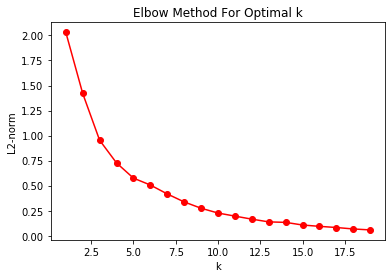

In [20]:
elbow_curve=elbow(SSD)
elbow_b05=np.empty([19,2])
elbow_b05=pd.DataFrame(elbow_b05,columns=['K','SSD'])
elbow_b05['K']=K
elbow_b05['SSD']=SSD
elbow_b05.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/elbow_b05.xlsx')

In [21]:
elbow_b05

,K,SSD
0,1,2.032199
1,2,1.420988
2,3,0.953718
3,4,0.726876
4,5,0.575184
5,6,0.506326
6,7,0.417192
7,8,0.337442
8,9,0.274319
9,10,0.226539


In [22]:
np.min(np.array(SSD))


0.05782017943009024

Cluster Boroughs. Run k-means to cluster the boroughs into 10 clusters.



In [23]:
boroughs_venues_sorted.shape

(33, 6)

In [24]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_
kmeans_labels=kmeans.labels_

In [25]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_boroughs_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [26]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
Kclusters_b05=pp['Cluster Labels'].value_counts().sort_index()
Kclusters_b05=Kclusters_b05.append(s_score)
Kclusters_b05


0    14.000000
1     1.000000
2    15.000000
3     1.000000
4     2.000000
5     0.343043
dtype: float64

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each borough.

In [27]:
# add clustering labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# merge London_borough_grouped with to add latitude/longitude for each borough
London_boroughs_merged =pd.merge(boroughs,boroughs_venues_sorted, on='Borough').sort_values('Cluster Labels')

London_boroughs_merged.head() # check the last columns!

,Code,Borough,Inner/Outer,GLA_P2017,GLA_H2017,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,E09000017,Hillingdon,Outer London,301000,110827,51.5441,-0.4760,0,food,shops,nightlife,travel,building
22,E09000023,Lewisham,Inner London,303400,131076,51.4452,-0.0209,0,food,shops,travel,nightlife,arts_entertainment
31,E09000032,Wandsworth,Inner London,321000,138149,51.4567,-0.1910,0,food,shops,nightlife,building,travel
15,E09000016,Havering,Outer London,254300,104098,51.5812,0.1837,0,shops,food,travel,nightlife,parks_outdoors
14,E09000015,Harrow,Outer London,252300,92557,51.5898,-0.3346,0,shops,food,travel,arts_entertainment,parks_outdoors


In [28]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer",timeout=50)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


Finally, let's visualize the resulting clusters

In [29]:
# create map
map_boroughs_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_boroughs_merged['Latitude'], London_boroughs_merged['Longitude'],
                                  London_boroughs_merged['Borough'], London_boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_boroughs_clusters)
       
map_boroughs_clusters


In [30]:
#map_boroughs_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_boroughs_clusters_Category05.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [31]:
    print ('CLuster 1: ')

 

CLuster 1: 


In [32]:
 London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==0,:]
    
 

,Code,Borough,Inner/Outer,GLA_P2017,GLA_H2017,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,E09000017,Hillingdon,Outer London,301000,110827,51.5441,-0.4760,0,food,shops,nightlife,travel,building
22,E09000023,Lewisham,Inner London,303400,131076,51.4452,-0.0209,0,food,shops,travel,nightlife,arts_entertainment
31,E09000032,Wandsworth,Inner London,321000,138149,51.4567,-0.1910,0,food,shops,nightlife,building,travel
15,E09000016,Havering,Outer London,254300,104098,51.5812,0.1837,0,shops,food,travel,nightlife,parks_outdoors
14,E09000015,Harrow,Outer London,252300,92557,51.5898,-0.3346,0,shops,food,travel,arts_entertainment,parks_outdoors
25,E09000026,Redbridge,Outer London,304200,110708,51.5590,0.0741,0,food,shops,travel,nightlife,arts_entertainment
11,E09000012,Hackney,Inner London,274300,115417,51.5450,-0.0553,0,food,shops,nightlife,travel,building
9,E09000010,Enfield,Outer London,333000,130328,51.6538,-0.0799,0,shops,food,nightlife,building,travel
10,E09000011,Greenwich,Outer London,280100,113964,51.4892,0.0648,0,food,shops,travel,nightlife,parks_outdoors
28,E09000029,Sutton,Outer London,202600,85243,51.3618,-0.1945,0,food,shops,nightlife,travel,parks_outdoors


In [33]:
 print ('CLuster 2: ')

CLuster 2: 


In [34]:
London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==1,:]

,Code,Borough,Inner/Outer,GLA_P2017,GLA_H2017,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
24,E09000025,Newham,Inner London,342900,119172,51.5077,0.0469,1,travel,food,shops,parks_outdoors,nightlife


In [35]:
print ('Cluster 3: ')

Cluster 3: 


In [36]:
London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==2,:]

,Code,Borough,Inner/Outer,GLA_P2017,GLA_H2017,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
27,E09000028,Southwark,Inner London,314300,134254,51.5035,-0.0804,2,food,nightlife,parks_outdoors,shops,arts_entertainment
21,E09000022,Lambeth,Inner London,328900,144400,51.4607,-0.1163,2,food,shops,nightlife,arts_entertainment,building
29,E09000030,Tower Hamlets,Inner London,304000,123720,51.5099,-0.0059,2,food,travel,shops,building,parks_outdoors
23,E09000024,Merton,Outer London,208100,84201,51.4014,-0.1958,2,food,shops,parks_outdoors,nightlife,travel
30,E09000031,Waltham Forest,Outer London,276200,105981,51.5908,-0.0134,2,food,parks_outdoors,nightlife,arts_entertainment,building
26,E09000027,Richmond upon Thames,Outer London,197300,85108,51.4479,-0.3260,2,food,shops,nightlife,travel,building
0,E09000001,City of London,Inner London,8800,5326,51.5155,-0.0922,2,food,arts_entertainment,shops,parks_outdoors,building
18,E09000019,Islington,Inner London,231200,105038,51.5416,-0.1022,2,food,nightlife,shops,arts_entertainment,parks_outdoors
13,E09000014,Haringey,Inner London,278000,115608,51.6000,-0.1119,2,food,shops,nightlife,travel,parks_outdoors
12,E09000013,Hammersmith and Fulham,Inner London,185300,83552,51.4927,-0.2339,2,food,shops,nightlife,travel,parks_outdoors


In [37]:
print('Cluster 4: ')

Cluster 4: 


In [38]:
London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==3,:]

,Code,Borough,Inner/Outer,GLA_P2017,GLA_H2017,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,E09000002,Barking and Dagenham,Outer London,209000,78188,51.5607,0.1557,3,parks_outdoors,shops,travel,building,nightlife


In [39]:
print('Cluster 5:')

Cluster 5:


In [40]:
London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==4,:]

,Code,Borough,Inner/Outer,GLA_P2017,GLA_H2017,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,E09000018,Hounslow,Outer London,274200,105887,51.4746,-0.3680,4,food,travel,parks_outdoors,shops,nightlife
2,E09000003,Barnet,Outer London,389600,151423,51.6252,-0.1517,4,food,travel,shops,parks_outdoors,nightlife


In [41]:
Borough_Cluster_05={}
for ii in range(kclusters):
    Borough_Cluster_05[ii]=[London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==ii,:]['Borough'].values.tolist()]
                        
                        

In [42]:
Borough_Cluster_05=pd.DataFrame.from_dict(Borough_Cluster_05)
Borough_Cluster_05.to_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Borough_Cluster_05.csv') 


In [43]:
Borough_Cluster_05[0][0]

['Hillingdon',
 'Lewisham',
 'Wandsworth',
 'Havering',
 'Harrow',
 'Redbridge',
 'Hackney',
 'Enfield',
 'Greenwich',
 'Sutton',
 'Bromley',
 'Brent',
 'Bexley',
 'Kingston upon Thames']

In [44]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_b05=np.empty([kclusters,2])                                         
Centroids_b05=pd.DataFrame(Centroids_b05, columns=['x-Latitude','y-Longitude']) 
Centroids_b05['x-Latitude']=x
Centroids_b05['y-Longitude']=y
Centroids_b05.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_b05.xlsx')

In [45]:
Centroids_b05

,x-Latitude,y-Longitude
0,51.503707,-0.103386
1,51.507700,0.046900
2,51.498447,-0.142800
3,51.560700,0.155700
4,51.549900,-0.259850


In [47]:
features=London_boroughs_grouped_clustering.columns.tolist()
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_boroughs_merged.loc[London_boroughs_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Borough']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0
score

,0,1,2,3,4
arts_entertainment,0,0,0,0,0
building,0,0,0,0,0
food,11,0,15,0,2
nightlife,0,0,0,0,0
parks_outdoors,0,0,0,1,0
shops,3,0,0,0,0
travel,0,1,0,0,0


In [49]:
p_score=score.max().sum()/score.sum().sum()
p_score=pd.Series(p_score,index=[kclusters+1])
Kclusters_b05=Kclusters_b05.append(p_score)

In [50]:
Kclusters_b05.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_b05.xlsx')
Kclusters_b05

0    14.000000
1     1.000000
2    15.000000
3     1.000000
4     2.000000
5     0.343043
6     0.909091
dtype: float64